In [1]:
! pip install pyspark

In [3]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Retail_Analytics").getOrCreate()
spark


In [4]:
df = spark.read.csv("retail_branch_data.csv",header = "True", inferSchema=True)

In [7]:
df.show()

+---------+----------+------------+----------+-------+------+---------+
|Branch_ID|      Date|Product_Code|Units_Sold|Revenue|Region|Sales_Rep|
+---------+----------+------------+----------+-------+------+---------+
|    BR039|2024-09-05|       P0147|         2|2017.07| South|   EMP053|
|    BR029|2024-03-24|       P0126|        10|1648.49|  West|   EMP068|
|    BR015|2024-01-30|       P0135|        11|1086.13| North|   EMP016|
|    BR043|2024-10-25|       P0187|         7|2252.32|  East|   EMP053|
|    BR008|2024-03-23|       P0153|        14|4041.01|  West|   EMP034|
|    BR021|2025-03-13|       P0119|        13|2175.59| South|   EMP001|
|    BR039|2025-07-23|       P0102|         1|4350.95|  East|   EMP086|
|    BR019|2023-09-15|       P0168|         9|4690.48| South|   EMP064|
|    BR023|2025-01-20|       P0102|         3|1362.29|  West|   EMP025|
|    BR011|2023-09-05|       P0139|         5|4957.49| South|   EMP056|
|    BR011|2023-12-21|       P0159|         8|2135.44|  East|   

In [8]:
df.printSchema()

root
 |-- Branch_ID: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- Product_Code: string (nullable = true)
 |-- Units_Sold: integer (nullable = true)
 |-- Revenue: double (nullable = true)
 |-- Region: string (nullable = true)
 |-- Sales_Rep: string (nullable = true)



In [9]:
df.describe().show()

+-------+---------+------------+----------------+------------------+------+---------+
|summary|Branch_ID|Product_Code|      Units_Sold|           Revenue|Region|Sales_Rep|
+-------+---------+------------+----------------+------------------+------+---------+
|  count|   100000|      100000|          100000|            100000|100000|   100000|
|   mean|     NULL|        NULL|        10.00928| 2550.708197099985|  NULL|     NULL|
| stddev|     NULL|        NULL|5.48479121853764|1416.4793404750278|  NULL|     NULL|
|    min|    BR001|       P0100|               1|            100.04|  East|   EMP001|
|    max|    BR050|       P0199|              19|            5000.0|  West|   EMP100|
+-------+---------+------------+----------------+------------------+------+---------+



In [10]:
from pyspark.sql.functions import col, sum

df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

+---------+----+------------+----------+-------+------+---------+
|Branch_ID|Date|Product_Code|Units_Sold|Revenue|Region|Sales_Rep|
+---------+----+------------+----------+-------+------+---------+
|        0|   0|           0|         0|      0|     0|        0|
+---------+----+------------+----------+-------+------+---------+



**Total_Revenue_per_Region**

In [19]:
from pyspark.sql.functions import round, format_number

df.groupby("Region").agg(format_number(sum("Revenue"), 2).alias("Total_Revenue")).show()

+------+-------------+
|Region|Total_Revenue|
+------+-------------+
| South|64,306,711.62|
|  East|63,811,532.87|
|  West|63,526,274.90|
| North|63,426,300.32|
+------+-------------+



**Total_Revenue per Branch**

In [21]:
df.groupby("Branch_ID").agg(format_number(sum("Revenue"),2).alias("Total_Revenue")).show()

+---------+-------------+
|Branch_ID|Total_Revenue|
+---------+-------------+
|    BR005| 5,190,403.22|
|    BR010| 5,137,137.45|
|    BR019| 5,092,556.24|
|    BR016| 5,148,827.36|
|    BR026| 5,313,660.89|
|    BR006| 4,982,640.40|
|    BR035| 4,833,181.45|
|    BR017| 5,180,958.04|
|    BR011| 4,959,252.37|
|    BR039| 5,099,512.89|
|    BR009| 5,040,178.95|
|    BR040| 5,220,159.44|
|    BR044| 5,283,920.98|
|    BR045| 5,232,125.15|
|    BR028| 5,221,197.90|
|    BR032| 5,188,976.47|
|    BR023| 5,283,568.42|
|    BR022| 5,175,854.82|
|    BR050| 4,904,164.29|
|    BR046| 4,809,359.15|
+---------+-------------+
only showing top 20 rows



**Monthly_Revenue_Trend**

In [28]:
from pyspark.sql.functions import year, month, date_format

df_monthly = df.withColumn("Year", year("Date")).withColumn("Month_Name", date_format("Date", "MMMM"))

df_monthly.groupby("Year","Month_Name").agg(format_number(sum("Revenue"),2).alias("Total_Revenue")).orderBy("Year","Month_Name").show(30)

+----+----------+-------------+
|Year|Month_Name|Total_Revenue|
+----+----------+-------------+
|2023|    August|10,746,548.88|
|2023|  December|10,843,034.06|
|2023|  November|10,406,573.56|
|2023|   October|10,719,660.13|
|2023| September|10,583,149.03|
|2024|     April|10,347,969.17|
|2024|    August|10,425,800.28|
|2024|  December|10,921,976.18|
|2024|  February|10,119,670.71|
|2024|   January|10,824,057.82|
|2024|      July|10,499,686.61|
|2024|      June|10,501,777.53|
|2024|     March|10,786,021.43|
|2024|       May|10,600,625.53|
|2024|  November|10,421,786.52|
|2024|   October|10,854,866.38|
|2024| September|10,836,442.41|
|2025|     April|10,505,078.16|
|2025|  February| 9,853,139.83|
|2025|   January|11,032,333.17|
|2025|      July|11,072,290.78|
|2025|      June|10,562,641.34|
|2025|     March|10,945,456.60|
|2025|       May|10,660,233.60|
+----+----------+-------------+



**Avg_Revenue_per_Transaction**

In [29]:
df.selectExpr("avg(Revenue) as Avg_Revenue_per_Transaction").show()

+---------------------------+
|Avg_Revenue_per_Transaction|
+---------------------------+
|          2550.708197099985|
+---------------------------+



**Units Sold Per Product**

In [31]:
df.groupby("Product_Code").agg(sum("Units_Sold").alias("Units_Sold")).orderBy("Units_Sold", ascending = False).show()

+------------+----------+
|Product_Code|Units_Sold|
+------------+----------+
|       P0186|     10836|
|       P0164|     10780|
|       P0179|     10772|
|       P0168|     10631|
|       P0180|     10573|
|       P0161|     10571|
|       P0173|     10555|
|       P0138|     10525|
|       P0155|     10515|
|       P0157|     10489|
|       P0122|     10470|
|       P0121|     10463|
|       P0174|     10448|
|       P0125|     10427|
|       P0165|     10401|
|       P0183|     10398|
|       P0100|     10397|
|       P0110|     10396|
|       P0171|     10395|
|       P0111|     10367|
+------------+----------+
only showing top 20 rows



**Avg Units Sold Per Branch**

In [34]:
from pyspark.sql.functions import avg

df.groupby("Branch_ID").agg(format_number(avg("Units_Sold"),2).alias("Avg_Units_Sold_Per_Branch")).show()

+---------+-------------------------+
|Branch_ID|Avg_Units_Sold_Per_Branch|
+---------+-------------------------+
|    BR005|                    10.08|
|    BR010|                     9.93|
|    BR019|                    10.01|
|    BR016|                    10.03|
|    BR026|                    10.00|
|    BR006|                     9.91|
|    BR035|                    10.10|
|    BR017|                     9.83|
|    BR011|                     9.94|
|    BR039|                    10.18|
|    BR009|                     9.99|
|    BR040|                    10.11|
|    BR044|                    10.10|
|    BR045|                     9.93|
|    BR028|                    10.12|
|    BR032|                     9.95|
|    BR023|                    10.14|
|    BR022|                    10.15|
|    BR050|                    10.04|
|    BR046|                     9.95|
+---------+-------------------------+
only showing top 20 rows



**Revenue per sales Person**

In [35]:
df.groupby("Sales_Rep").agg(format_number(sum("Revenue"),2).alias("Total_Revenue")).show()

+---------+-------------+
|Sales_Rep|Total_Revenue|
+---------+-------------+
|   EMP090| 2,479,692.65|
|   EMP094| 2,543,452.51|
|   EMP068| 2,667,427.58|
|   EMP006| 2,481,787.21|
|   EMP095| 2,544,010.20|
|   EMP033| 2,613,227.11|
|   EMP053| 2,601,034.25|
|   EMP007| 2,514,245.20|
|   EMP093| 2,532,965.39|
|   EMP080| 2,605,243.86|
|   EMP097| 2,732,067.80|
|   EMP048| 2,674,832.80|
|   EMP086| 2,668,508.77|
|   EMP028| 2,577,901.56|
|   EMP072| 2,642,922.74|
|   EMP085| 2,587,358.53|
|   EMP064| 2,525,073.86|
|   EMP061| 2,426,396.03|
|   EMP052| 2,666,803.11|
|   EMP044| 2,708,933.47|
+---------+-------------+
only showing top 20 rows



**Number of Transactions Per Day**

In [40]:
df.groupby("Date").count().withColumnRenamed("count", "Transactions").withColumn("Day_Name", date_format("Date", "EEEE")).orderBy("Transactions", ascending = False).show()

+----------+------------+---------+
|      Date|Transactions| Day_Name|
+----------+------------+---------+
|2024-12-12|         178| Thursday|
|2025-03-09|         172|   Sunday|
|2023-11-09|         170| Thursday|
|2024-05-17|         167|   Friday|
|2024-05-15|         166|Wednesday|
|2023-12-21|         166| Thursday|
|2024-07-08|         165|   Monday|
|2025-07-13|         165|   Sunday|
|2025-01-17|         164|   Friday|
|2024-06-16|         164|   Sunday|
|2024-02-17|         163| Saturday|
|2024-11-27|         163|Wednesday|
|2025-07-05|         162| Saturday|
|2025-03-23|         162|   Sunday|
|2025-01-02|         162| Thursday|
|2024-02-03|         161| Saturday|
|2024-11-14|         161| Thursday|
|2024-10-09|         161|Wednesday|
|2025-03-04|         161|  Tuesday|
|2025-06-10|         161|  Tuesday|
+----------+------------+---------+
only showing top 20 rows



**Top 5 Branches by Revenue**

In [47]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, row_number

windowSpec = Window.orderBy(col("Branch_Revenue").desc())
top_branches = df.groupBy("Branch_ID").agg(round(sum("Revenue"),2).alias("Branch_Revenue"))
top_branches = top_branches.withColumn("rank", rank().over(windowSpec)).filter(col("rank") <= 5)
top_branches.show()

+---------+--------------+----+
|Branch_ID|Branch_Revenue|rank|
+---------+--------------+----+
|    BR030|    5316296.78|   1|
|    BR026|    5313660.89|   2|
|    BR021|    5307638.82|   3|
|    BR044|    5283920.98|   4|
|    BR023|    5283568.42|   5|
+---------+--------------+----+



**Top 5 Sales Persons by Avg Revenue per Transaction**

In [46]:
df.groupby("Sales_Rep").agg(round(avg("Revenue"),2).alias("Avg_Revenue")).orderBy("Avg_Revenue", ascending = False).limit(5).show()

+---------+-----------+
|Sales_Rep|Avg_Revenue|
+---------+-----------+
|   EMP048|    2664.18|
|   EMP064|    2633.03|
|   EMP014|    2630.31|
|   EMP031|    2629.82|
|   EMP096|    2619.24|
+---------+-----------+



**Peak Sales Day Per Region**

In [48]:
df_peak = df.groupby("Region", "Date").agg(sum("Revenue").alias("Total_Day_Revenue"))

w = Window.partitionBy("Region").orderBy(col("Total_Day_Revenue").desc())
df_peak.withColumn("row_num", row_number().over(w)).filter("row_num = 1").show()

+------+----------+-----------------+-------+
|Region|      Date|Total_Day_Revenue|row_num|
+------+----------+-----------------+-------+
|  East|2024-07-10|        138624.01|      1|
| North|2025-01-17|        139474.38|      1|
| South|2025-07-17|         139550.1|      1|
|  West|2024-10-09|        137192.14|      1|
+------+----------+-----------------+-------+



**Avg Basket Size (Units Sold / Transaction)**

In [49]:
df.selectExpr("avg(Units_Sold) as Avg_Basket_Size").show()


+---------------+
|Avg_Basket_Size|
+---------------+
|       10.00928|
+---------------+



**Revenue Variance across Regions**

In [50]:
df.groupBy("Region").agg({"Revenue": "stddev"}).show()


+------+------------------+
|Region|   stddev(Revenue)|
+------+------------------+
| South| 1415.745596464133|
|  East|1416.2519790942724|
|  West|1416.9975994153594|
| North| 1416.945604033818|
+------+------------------+



# **Visualization**

In [51]:
# In PySpark we can't directly plot, but we can export to Pandas:

**Monthly Revenue Trend (Line Chart)**

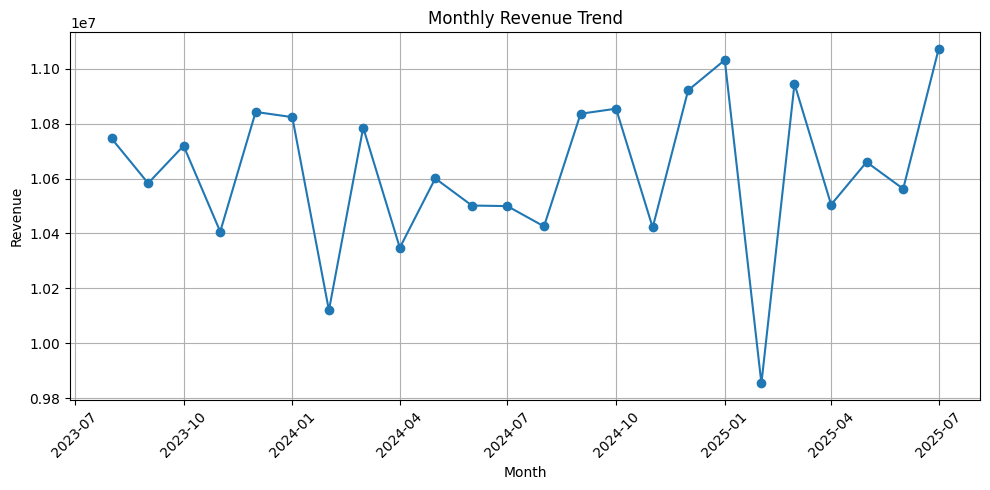

In [53]:
from pyspark.sql.functions import year, month, date_format
import pandas as pd
import matplotlib.pyplot as plt

# Add Year and Month columns
df_monthly = df.withColumn("Year", year("Date")) \
               .withColumn("Month", month("Date")) \
               .withColumn("Month_Name", date_format("Date", "MMMM"))

# Group and convert to Pandas
monthly_df = df_monthly.groupBy("Year", "Month") \
                       .sum("Revenue") \
                       .toPandas()

# Create date column for plotting
monthly_df['Date'] = pd.to_datetime(monthly_df['Year'].astype(str) + '-' + monthly_df['Month'].astype(str))
monthly_df = monthly_df.sort_values('Date')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_df['Date'], monthly_df['sum(Revenue)'], marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Top 10 Branches by Total Revenue (Bar Chart)**

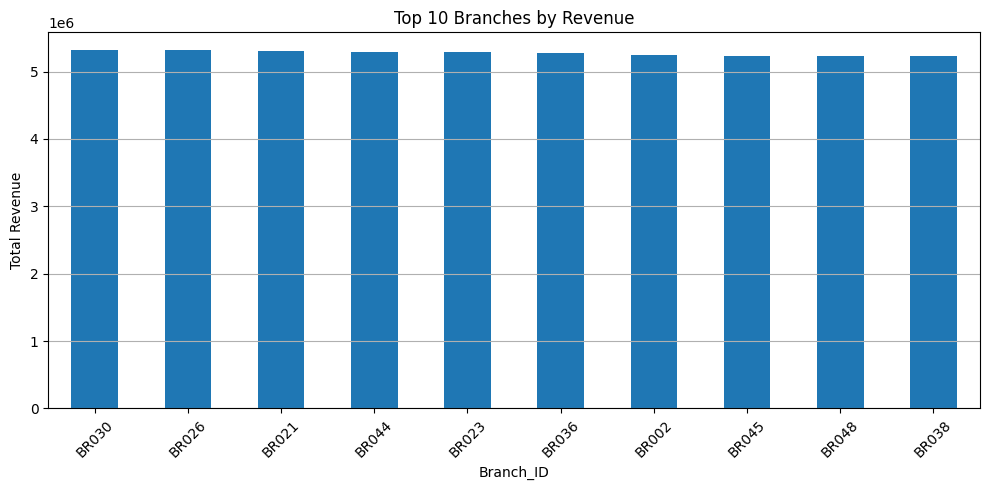

In [54]:
top_branch_df = df.groupBy("Branch_ID").sum("Revenue")\
    .withColumnRenamed("sum(Revenue)", "Total_Revenue").orderBy("Total_Revenue", ascending=False).limit(10).toPandas()

top_branch_df.plot(kind='bar', x='Branch_ID', y='Total_Revenue', figsize=(10,5), legend=False)
plt.title("Top 10 Branches by Revenue")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


**Top 10 Sales Persons by Revenue (Horizontal Bar Chart)**

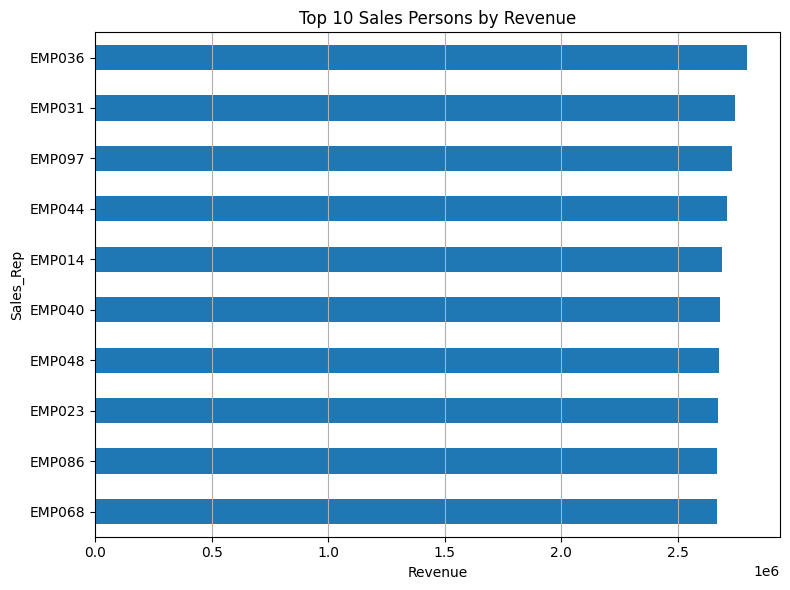

In [56]:
top_reps_df = df.groupBy("Sales_Rep").sum("Revenue")\
    .withColumnRenamed("sum(Revenue)", "Total_Revenue").orderBy("Total_Revenue", ascending=False).limit(10).toPandas()

top_reps_df.sort_values("Total_Revenue").plot(kind='barh', x='Sales_Rep', y='Total_Revenue', figsize=(8,6), legend=False)
plt.title("Top 10 Sales Persons by Revenue")
plt.xlabel("Revenue")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


** Revenue by Region (Pie Chart)**

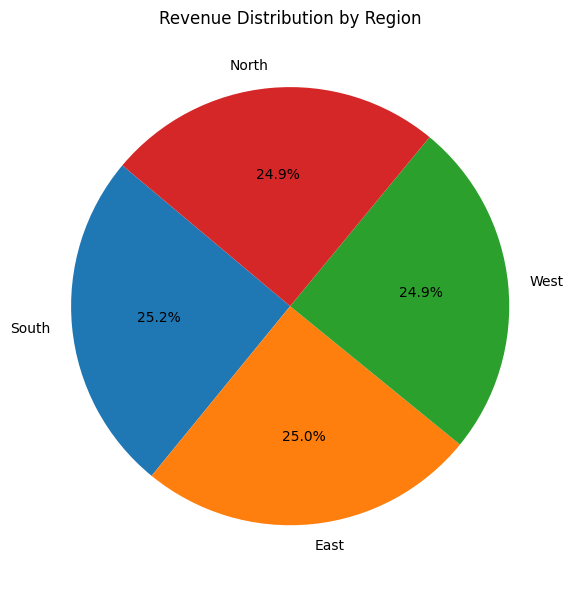

In [57]:
region_df = df.groupBy("Region").sum("Revenue").withColumnRenamed("sum(Revenue)", "Total_Revenue").toPandas()

plt.figure(figsize=(6,6))
plt.pie(region_df['Total_Revenue'], labels=region_df['Region'], autopct='%1.1f%%', startangle=140)
plt.title("Revenue Distribution by Region")
plt.tight_layout()
plt.show()
